# COL3A1

The [COL3A1](https://www.omim.org/entry/120180) gene encodes the collagen alpha-1 (III) chain. Three of these chains can multimerize to form type III collagen, a major component of the extracellular matrix of elastic tissues like dermis, vasculature and hollow organs for which it provides structural support and is involved in processes like wound healing, angiogenesis, development and cell differentiation. Binding partners of COL3A1 are cell surface receptors, other collagens (I & IV), fibronectin and proteoglycans ([Omar R, et al. Matrix Biol Plus. 2021](https://pubmed.ncbi.nlm.nih.gov/34849481/)).
At least in mice expression of Col3a1 is also found in the developing, but not the adult brain and liver ([Kuivaniemi H, et al. Gene. 2019](https://pubmed.ncbi.nlm.nih.gov/31075413/)).

After gene expression the N-terminal signal peptide (nt118-189) is cleaved off of the preproprotein to generate the proprotein. The C-terminal propeptide (nt3781-4515) induces homotrimerization, stabilized by disulfide bonds (AA1196, 1197). The multimerized proprotein again undergoes cleavage of the N-terminal (nt190-577) and C-terminal propeptide, giving rise to the mature protein. The mature protein consists of a stretch of uninterrupted repeats of a Glycin-X-Y motif (where X and Y are often Proline of Hydroxyproline; nt619-3705) flanked by N-terminal (nt577-618) and C-terminal (nt3706-3780) telopeptides. The Glycin-X-Y stretch in each chain folds into a left-handed helix and the three chains are then wrapped together into a right-handed super-helix which is crosslinked to other collagens via Lysine-links (AA110, 193; [Kuivaniemi H, et al. Gene. 2019](https://pubmed.ncbi.nlm.nih.gov/31075413/), [Parkin JD, et al. PLoS One. 2017](https://pubmed.ncbi.nlm.nih.gov/28704418/)). 

OMIM distinguishes two different disorders associated with germline variants in COL3A1, which are inherited in an autosomally-dominant and autosomally-recessive fashion respectively:
1. [Vascular Ehlers-Danlos syndrome (vEDS/ EDSVASC)](https://www.omim.org/clinicalSynopsis/130050): characterized by only mild joint hyper-mobility and skin hyper-flexibility, but thin skin with visible veins, and characteristic facial features (thin lips and nose, lobeless ears) and complicated by ruptures of vasculature and hollow organs. Inherited autosomally-dominant.
2. [Polymicrogyria (with or with vEDS; PMGEDSV)](https://www.omim.org/clinicalSynopsis/618343): characterized by polymicrogyria and other structural brain defects, but only variable amounts of developmental delay/ intellectual disability & seizures and also variable amounts of vEDS-typical features. Inherited autosomally-recessive.

Several previous publications have reported candidate genotype-phenotype correlations on the COL3A1 gene.

<ol>
<li>Reviewing the literature [Kuivaniemi H, et al. Gene. 2019](https://pubmed.ncbi.nlm.nih.gov/31075413/) propose, that monoallelic variants lead to vEDS, while biallelic variants lead to a phenotype involving polymicrogyria. </li>
<li>he same authors further propose, that male vEDS patients are more frequently affected by vascular events compared to female patients. </li>
<li>[Pepin MG, et al.  Genet Med. 2014](https://pubmed.ncbi.nlm.nih.gov/24922459/) suggest, that heterozygous null mutations show an overall better survival than  missense mutations and splice mutations. Splice mutations show the shortest median survival.  [Frank M, et al. Eur J Hum Genet. 2015](https://pubmed.ncbi.nlm.nih.gov/25758994/) show a very similiar effect but on the age of onset. </li>
</ol>

While [Kuivaniemi H, et al. Gene. 2019](https://pubmed.ncbi.nlm.nih.gov/31075413/) don´t apply formal statistical testing to the data, [Frank M, et al. Eur J Hum Genet. 2015](https://pubmed.ncbi.nlm.nih.gov/25758994/) use a log rank test and [Pepin MG, et al.  Genet Med. 2014](https://pubmed.ncbi.nlm.nih.gov/24922459/) employ Cox regression.

Therefor we tested the influence of mono- and bi-allelic mutations on the occurence of polymicrogyria, the influence of sex on the occurrence of vascular events and the influence of null-mutations against missense mutations and splice mutations on the onset of signs of vEDS.

In [21]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using genophenocorr version 0.9.1


# COL3A1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for COL3A1.

In [22]:
gene_symbol = 'COL3A1'
mane_tx_id = 'NM_000090.4'
mane_protein_id = "NP_000081.2" #collagen alpha-1(III) chain preproprotein"

In [23]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.23") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 41/41 [00:00<00:00, 86.66individuals/s]
Validated under permissive policy
No errors or warnings were found


In [24]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
29,Bruising susceptibility
25,Dermal translucency
19,Finger joint hypermobility
14,Spontaneous pneumothorax
12,Arterial rupture
11,Arterial dissection
9,Gingival fragility
7,Aortic dissection
6,Talipes equinovarus
6,Polymicrogyria


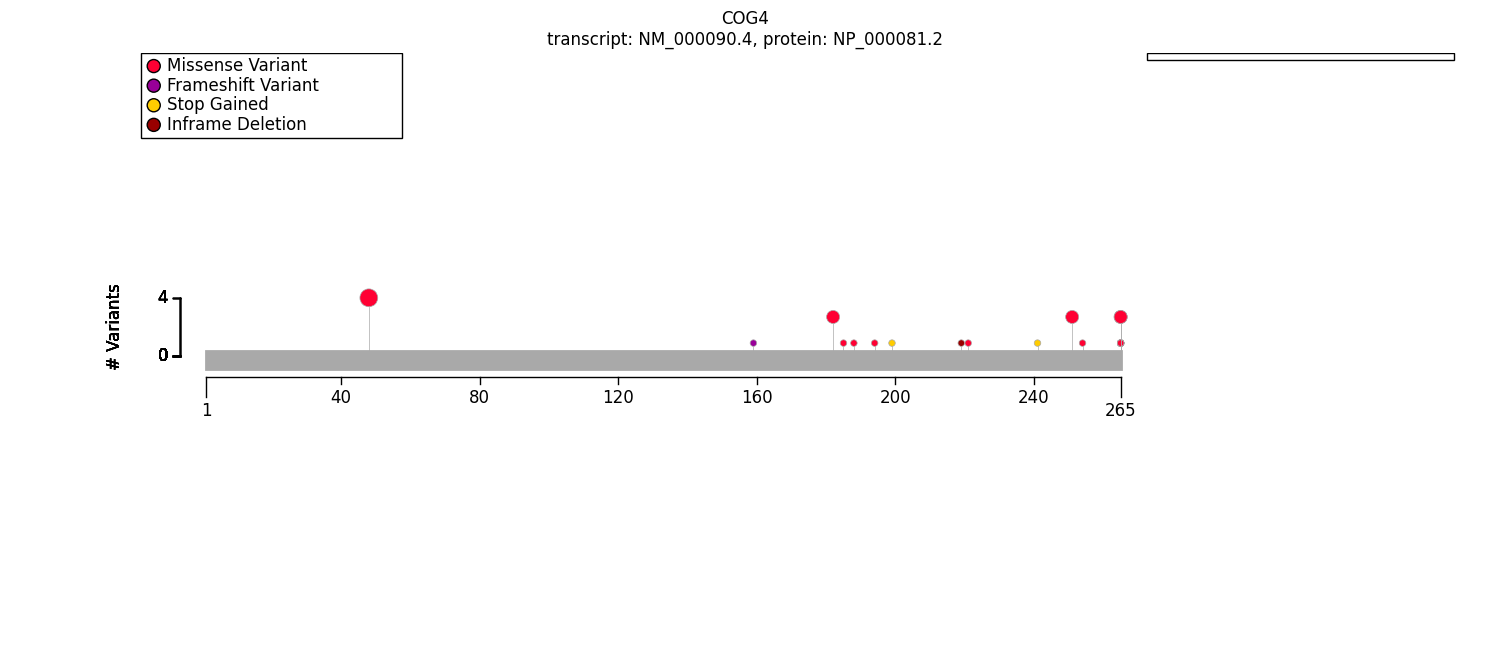

In [25]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
import pandas as pd
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(mane_tx_id)
features = []
df = pd.DataFrame(features, columns=["region","category","start", "end"])
protein_meta = ProteinMetadata.from_feature_frame(protein_id=mane_protein_id, label="COG4", features=df, protein_length=265)


COL3A1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
COL3A1_fig.tight_layout()

In [26]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
4,2_188984825_188984825_C_G,c.145C>G (p.Pro49Ala),2,missense
2,2_188988099_188988099_G_A,c.547G>A (p.Gly183Ser),6,missense
1,2_188989416_188989422_TGCTATA_T,c.659_664del (p.Ala220_Ile221del),8,inframe deletion
1,2_188990317_188990317_G_A,c.755G>A (p.Gly252Asp),10,missense
1,2_188988590_188988590_G_A,c.583G>A (p.Gly195Arg),7,"missense, splice region"
1,2_189004302_189004302_G_A,c.2869G>A (p.Gly957Ser),40,missense
1,2_188997189_188997189_C_T,c.1786C>T (p.Arg596Ter),25,stop gained
1,2_188991727_188991727_G_C,c.951+5G>C (-),-,"splice donor 5th base, intronic"
1,2_188998324_188998324_G_C,c.1977+5G>C (-),-,"splice donor 5th base, intronic"
1,2_188994593_188994593_G_T,c.1346G>T (p.Arg449Leu),19,"missense, splice region"


# Genotype-Phenotype Correlation (GPC) Analysis

In [27]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [28]:
from gpsea.model import VariantEffect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect
from gpsea.view import MtcStatsViewer

is_missense = variant_effect(VariantEffect.MISSENSE_VARIANT, mane_tx_id)
missense_clf = monoallelic_classifier(
    a_predicate=is_missense,
    b_predicate=~is_missense,
    a_label='Missense', 
    b_label='Other'
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

mtc_viewer = MtcStatsViewer()
mtc_viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,77
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,48
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,36


In [29]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, missense_result)

Allele group                                       Missense          Other  \
                                                      Count Percent  Count   
Gingival fragility [HP:0034518]                        3/19     16%   6/12   
Dermal translucency [HP:0010648]                      12/19     63%  11/14   
Bruising susceptibility [HP:0000978]                  15/20     75%  12/14   
Finger joint hypermobility [HP:0006094]               10/19     53%   9/14   
Spontaneous pneumothorax [HP:0002108]                  8/21     38%   6/14   
Small joint hypermobilty [HP:0430046]                 10/10    100%    9/9   
Abnormality of joint mobility [HP:0011729]            10/10    100%    9/9   
Abnormality of hand joint mobility [HP:0006256]       10/10    100%    9/9   
Abnormal finger morphology [HP:0001167]               10/10    100%    9/9   
Abnormal appendicular skeleton morphology [HP:0...    10/10    100%    9/9   
Subcutaneous hemorrhage [HP:0001933]                  15/15    100%  12/12   
Abnormal blood vessel morphology [HP:0033353]         10/10    100%    8/8   

Allele group                                                                   \
                                                   Percent Corrected p values   
Gingival fragility [HP:0034518]                        50%           0.674278   
Dermal translucency [HP:0010648]                       79%           1.000000   
Bruising susceptibility [HP:0000978]                   86%           1.000000   
Finger joint hypermobility [HP:0006094]                64%           1.000000   
Spontaneous pneumothorax [HP:0002108]                  43%           1.000000   
Small joint hypermobilty [HP:0430046]                 100%           1.000000   
Abnormality of joint mobility [HP:0011729]            100%           1.000000   
Abnormality of hand joint mobility [HP:0006256]       100%           1.000000   
Abnormal finger morphology [HP:0001167]               100%           1.000000   
Abnormal appendicular skeleton morphology [HP:0...    100%           1.000000   
Subcutaneous hemorrhage [HP:0001933]                  100%           1.000000   
Abnormal blood vessel morphology [HP:0033353]         100%           1.000000   

Allele group                                                  
                                                    p values  
Gingival fragility [HP:0034518]                     0.056190  
Dermal translucency [HP:0010648]                    0.455080  
Bruising susceptibility [HP:0000978]                0.672174  
Finger joint hypermobility [HP:0006094]             0.722801  
Spontaneous pneumothorax [HP:0002108]               1.000000  
Small joint hypermobilty [HP:0430046]               1.000000  
Abnormality of joint mobility [HP:0011729]          1.000000  
Abnormality of hand joint mobility [HP:0006256]     1.000000  
Abnormal finger morphology [HP:0001167]             1.000000  
Abnormal appendicular skeleton morphology [HP:0...  1.000000  
Subcutaneous hemorrhage [HP:0001933]                1.000000  
Abnormal blood vessel morphology [HP:0033353]       1.000000

In [30]:
import gpsea.analysis.predicate
from gpsea.model.genome import Region
from gpsea.analysis.predicate import protein_region

is_triple = protein_region(region=Region(start=167, end=1196), tx_id=mane_tx_id)

triple_clf = monoallelic_classifier(
    a_predicate=is_triple,
    b_predicate=~is_triple,
    a_label='is_triple', 
    b_label='Other'
)

triple_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=triple_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, triple_result)


Allele group                                       is_triple         Other  \
                                                       Count Percent Count   
Dermal translucency [HP:0010648]                       15/24     62%   8/9   
Finger joint hypermobility [HP:0006094]                12/24     50%   7/9   
Spontaneous pneumothorax [HP:0002108]                   9/26     35%   5/9   
Bruising susceptibility [HP:0000978]                   19/25     76%   8/9   
Small joint hypermobilty [HP:0430046]                  12/12    100%   7/7   
Abnormality of joint mobility [HP:0011729]             12/12    100%   7/7   
Abnormality of hand joint mobility [HP:0006256]        12/12    100%   7/7   
Abnormal finger morphology [HP:0001167]                12/12    100%   7/7   
Abnormal appendicular skeleton morphology [HP:0...     12/12    100%   7/7   
Subcutaneous hemorrhage [HP:0001933]                   19/19    100%   8/8   
Abnormal blood vessel morphology [HP:0033353]          14/14    100%   4/4   

Allele group                                                                   \
                                                   Percent Corrected p values   
Dermal translucency [HP:0010648]                       89%                1.0   
Finger joint hypermobility [HP:0006094]                78%                1.0   
Spontaneous pneumothorax [HP:0002108]                  56%                1.0   
Bruising susceptibility [HP:0000978]                   89%                1.0   
Small joint hypermobilty [HP:0430046]                 100%                1.0   
Abnormality of joint mobility [HP:0011729]            100%                1.0   
Abnormality of hand joint mobility [HP:0006256]       100%                1.0   
Abnormal finger morphology [HP:0001167]               100%                1.0   
Abnormal appendicular skeleton morphology [HP:0...    100%                1.0   
Subcutaneous hemorrhage [HP:0001933]                  100%                1.0   
Abnormal blood vessel morphology [HP:0033353]         100%                1.0   

Allele group                                                  
                                                    p values  
Dermal translucency [HP:0010648]                    0.216638  
Finger joint hypermobility [HP:0006094]             0.240922  
Spontaneous pneumothorax [HP:0002108]               0.431768  
Bruising susceptibility [HP:0000978]                0.644458  
Small joint hypermobilty [HP:0430046]               1.000000  
Abnormality of joint mobility [HP:0011729]          1.000000  
Abnormality of hand joint mobility [HP:0006256]     1.000000  
Abnormal finger morphology [HP:0001167]             1.000000  
Abnormal appendicular skeleton morphology [HP:0...  1.000000  
Subcutaneous hemorrhage [HP:0001933]                1.000000  
Abnormal blood vessel morphology [HP:0033353]       1.000000

In [31]:
from gpsea.analysis.clf import diagnosis_classifier

dx_clf = diagnosis_classifier(
    diagnoses=('OMIM:130050', 'OMIM:618343'),
    labels=('Ehlers-Danlos syndrome, vascular type', 'Polymicrogyria with or without vascular-type EDS'),
)
dx_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=dx_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, dx_result)

Diagnosis                                          OMIM:130050          \
                                                         Count Percent   
Small joint hypermobilty [HP:0430046]                    19/19    100%   
Finger joint hypermobility [HP:0006094]                  19/33     58%   
Dermal translucency [HP:0010648]                         23/33     70%   
Talipes equinovarus [HP:0001762]                          4/32     12%   
Bruising susceptibility [HP:0000978]                     27/34     79%   
Joint hypermobility [HP:0001382]                         19/19    100%   
Abnormality of joint mobility [HP:0011729]               19/19    100%   
Abnormal finger morphology [HP:0001167]                  19/19    100%   
Abnormal appendicular skeleton morphology [HP:0...       19/19    100%   
Subcutaneous hemorrhage [HP:0001933]                     27/27    100%   
Abnormal systemic arterial morphology [HP:0011004]       16/16    100%   
Abnormal blood vessel morphology [HP:0033353]            18/18    100%   

Diagnosis                                          OMIM:618343          \
                                                         Count Percent   
Small joint hypermobilty [HP:0430046]                      2/5     40%   
Finger joint hypermobility [HP:0006094]                    0/3      0%   
Dermal translucency [HP:0010648]                           2/6     33%   
Talipes equinovarus [HP:0001762]                           2/5     40%   
Bruising susceptibility [HP:0000978]                       2/4     50%   
Joint hypermobility [HP:0001382]                           2/2    100%   
Abnormality of joint mobility [HP:0011729]                 2/2    100%   
Abnormal finger morphology [HP:0001167]                    1/1    100%   
Abnormal appendicular skeleton morphology [HP:0...         1/1    100%   
Subcutaneous hemorrhage [HP:0001933]                       2/2    100%   
Abnormal systemic arterial morphology [HP:0011004]         1/1    100%   
Abnormal blood vessel morphology [HP:0033353]              2/2    100%   

Diagnosis                                                              \
                                                   Corrected p values   
Small joint hypermobilty [HP:0430046]                        0.059289   
Finger joint hypermobility [HP:0006094]                      0.531291   
Dermal translucency [HP:0010648]                             0.531291   
Talipes equinovarus [HP:0001762]                             0.531291   
Bruising susceptibility [HP:0000978]                         0.558521   
Joint hypermobility [HP:0001382]                             1.000000   
Abnormality of joint mobility [HP:0011729]                   1.000000   
Abnormal finger morphology [HP:0001167]                      1.000000   
Abnormal appendicular skeleton morphology [HP:0...           1.000000   
Subcutaneous hemorrhage [HP:0001933]                         1.000000   
Abnormal systemic arterial morphology [HP:0011004]           1.000000   
Abnormal blood vessel morphology [HP:0033353]                1.000000   

Diagnosis                                                     
                                                    p values  
Small joint hypermobilty [HP:0430046]               0.004941  
Finger joint hypermobility [HP:0006094]             0.095238  
Dermal translucency [HP:0010648]                    0.162585  
Talipes equinovarus [HP:0001762]                    0.177097  
Bruising susceptibility [HP:0000978]                0.232717  
Joint hypermobility [HP:0001382]                    1.000000  
Abnormality of joint mobility [HP:0011729]          1.000000  
Abnormal finger morphology [HP:0001167]             1.000000  
Abnormal appendicular skeleton morphology [HP:0...  1.000000  
Subcutaneous hemorrhage [HP:0001933]                1.000000  
Abnormal systemic arterial morphology [HP:0011004]  1.000000  
Abnormal blood vessel morphology [HP:0033353]       1.000000

# Extend VariantPredicate class

This example shows how to extend the VariantPredicate class to create one's own predicate. In this case, we create a predicate to test for missense variants that affect glycine residues.

In [32]:
from gpsea.analysis.predicate import VariantPredicate, variant_effect
from gpsea.model import Variant, VariantEffect

class AffectsGlycineResidue(VariantPredicate):
    """
    Return True iff this variant is missense and the reference residue is Gylcine.
    """
    def __init__(self):
        super().__init__()

    def get_question(self) -> str:
        return self.description

    def test(self, variant: Variant) -> bool:
        """
        Test if the `variant` is a missense variant that affects a REF Gylcine residue

        Args:
            variant: an instance of :class:`~gpsea.model.Variant` to test.

        Returns:
            bool: `True` if the variant is a missense variant that affects a REF Gylcine residue
        """
        is_missense =  variant_effect(VariantEffect.MISSENSE_VARIANT, variant.get_preferred_tx_annotation().transcript_id)
        return is_missense.test(variant) and "p.Gly" in variant.get_preferred_tx_annotation().hgvsp
    
    def description(self) -> str:
        return self.__str__()
    
    def name(self) -> str:
        return self.__str__()
    
    def variable_name(self) -> str:
        return self.__str__()

    def __str__(self) -> str:
        return "Is Glycine Missense"
    
    def __repr__(self):
        return self.__str__()

In [33]:
is_gly_missense = AffectsGlycineResidue()
is_gly_missense_clf = monoallelic_classifier(
    a_predicate=is_gly_missense,
    b_predicate=~is_gly_missense,
    a_label='Gly missense', 
    b_label='Other'
)

is_gly_missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=is_gly_missense_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, is_gly_missense_result)

Allele group                                       Gly missense          \
                                                          Count Percent   
Gingival fragility [HP:0034518]                            2/18     11%   
Dermal translucency [HP:0010648]                          11/18     61%   
Bruising susceptibility [HP:0000978]                      14/19     74%   
Finger joint hypermobility [HP:0006094]                    9/18     50%   
Spontaneous pneumothorax [HP:0002108]                      8/20     40%   
Small joint hypermobilty [HP:0430046]                       9/9    100%   
Abnormality of joint mobility [HP:0011729]                  9/9    100%   
Abnormality of hand joint mobility [HP:0006256]             9/9    100%   
Abnormal finger morphology [HP:0001167]                     9/9    100%   
Abnormal appendicular skeleton morphology [HP:0...          9/9    100%   
Subcutaneous hemorrhage [HP:0001933]                      14/14    100%   
Abnormal blood vessel morphology [HP:0033353]             10/10    100%   

Allele group                                        Other          \
                                                    Count Percent   
Gingival fragility [HP:0034518]                      7/13     54%   
Dermal translucency [HP:0010648]                    12/15     80%   
Bruising susceptibility [HP:0000978]                13/15     87%   
Finger joint hypermobility [HP:0006094]             10/15     67%   
Spontaneous pneumothorax [HP:0002108]                6/15     40%   
Small joint hypermobilty [HP:0430046]               10/10    100%   
Abnormality of joint mobility [HP:0011729]          10/10    100%   
Abnormality of hand joint mobility [HP:0006256]     10/10    100%   
Abnormal finger morphology [HP:0001167]             10/10    100%   
Abnormal appendicular skeleton morphology [HP:0...  10/10    100%   
Subcutaneous hemorrhage [HP:0001933]                13/13    100%   
Abnormal blood vessel morphology [HP:0033353]         8/8    100%   

Allele group                                                           \
                                                   Corrected p values   
Gingival fragility [HP:0034518]                              0.199433   
Dermal translucency [HP:0010648]                             1.000000   
Bruising susceptibility [HP:0000978]                         1.000000   
Finger joint hypermobility [HP:0006094]                      1.000000   
Spontaneous pneumothorax [HP:0002108]                        1.000000   
Small joint hypermobilty [HP:0430046]                        1.000000   
Abnormality of joint mobility [HP:0011729]                   1.000000   
Abnormality of hand joint mobility [HP:0006256]              1.000000   
Abnormal finger morphology [HP:0001167]                      1.000000   
Abnormal appendicular skeleton morphology [HP:0...           1.000000   
Subcutaneous hemorrhage [HP:0001933]                         1.000000   
Abnormal blood vessel morphology [HP:0033353]                1.000000   

Allele group                                                  
                                                    p values  
Gingival fragility [HP:0034518]                     0.016619  
Dermal translucency [HP:0010648]                    0.282799  
Bruising susceptibility [HP:0000978]                0.426304  
Finger joint hypermobility [HP:0006094]             0.482424  
Spontaneous pneumothorax [HP:0002108]               1.000000  
Small joint hypermobilty [HP:0430046]               1.000000  
Abnormality of joint mobility [HP:0011729]          1.000000  
Abnormality of hand joint mobility [HP:0006256]     1.000000  
Abnormal finger morphology [HP:0001167]             1.000000  
Abnormal appendicular skeleton morphology [HP:0...  1.000000  
Subcutaneous hemorrhage [HP:0001933]                1.000000  
Abnormal blood vessel morphology [HP:0033353]       1.000000

In [34]:
# Allele count - mono- vis biallelic COL3A1 variants

from gpsea.analysis.clf import allele_count
from gpsea.analysis.predicate import gene

affects_COL3A1 = gene(symbol=gene_symbol)

allelic_clf = allele_count(
    counts=(0, 1),
    target=affects_COL3A1,
)

allele_count_result = analysis.compare_genotype_vs_phenotypes(
    cohort = cohort,
    gt_clf = allelic_clf,
    pheno_clfs = pheno_clfs
)
summarize_hpo_analysis(hpo, allele_count_result)

Allele count                                           0              1  \
                                                   Count Percent  Count   
Talipes equinovarus [HP:0001762]                     1/1    100%   3/31   
Spontaneous pneumothorax [HP:0002108]                1/1    100%  13/34   
Finger joint hypermobility [HP:0006094]              1/1    100%  18/32   
Small joint hypermobilty [HP:0430046]                1/1    100%  18/18   
Abnormality of joint mobility [HP:0011729]           1/1    100%  18/18   
Abnormality of hand joint mobility [HP:0006256]      1/1    100%  18/18   
Abnormal finger morphology [HP:0001167]              1/1    100%  18/18   
Abnormal appendicular skeleton morphology [HP:0...   1/1    100%  18/18   
Dermal translucency [HP:0010648]                     1/1    100%  22/32   
Bruising susceptibility [HP:0000978]                 1/1    100%  26/33   
Subcutaneous hemorrhage [HP:0001933]                 1/1    100%  26/26   

Allele count                                                                   \
                                                   Percent Corrected p values   
Talipes equinovarus [HP:0001762]                       10%                1.0   
Spontaneous pneumothorax [HP:0002108]                  38%                1.0   
Finger joint hypermobility [HP:0006094]                56%                1.0   
Small joint hypermobilty [HP:0430046]                 100%                1.0   
Abnormality of joint mobility [HP:0011729]            100%                1.0   
Abnormality of hand joint mobility [HP:0006256]       100%                1.0   
Abnormal finger morphology [HP:0001167]               100%                1.0   
Abnormal appendicular skeleton morphology [HP:0...    100%                1.0   
Dermal translucency [HP:0010648]                       69%                1.0   
Bruising susceptibility [HP:0000978]                   79%                1.0   
Subcutaneous hemorrhage [HP:0001933]                  100%                1.0   

Allele count                                                 
                                                   p values  
Talipes equinovarus [HP:0001762]                      0.125  
Spontaneous pneumothorax [HP:0002108]                 0.400  
Finger joint hypermobility [HP:0006094]               1.000  
Small joint hypermobilty [HP:0430046]                 1.000  
Abnormality of joint mobility [HP:0011729]            1.000  
Abnormality of hand joint mobility [HP:0006256]       1.000  
Abnormal finger morphology [HP:0001167]               1.000  
Abnormal appendicular skeleton morphology [HP:0...    1.000  
Dermal translucency [HP:0010648]                      1.000  
Bruising susceptibility [HP:0000978]                  1.000  
Subcutaneous hemorrhage [HP:0001933]                  1.000

## Hypothesis:
Null variants show a later onset of symptoms than missense variants in vEDS. Note that because we are using a monoallelic classifier, biallelic cases will be omitted (sothe following tests will not include polymicrogyria).

In [35]:
from gpsea.analysis.temporal.endpoint import disease_onset
from gpsea.analysis.temporal.stats import LogRankTest
from gpsea.analysis.temporal import SurvivalAnalysis


disease = "OMIM:130050"  
endpoint = disease_onset(disease_id=disease)
is_missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_clf = monoallelic_classifier(
    a_predicate=is_missense,
    b_predicate=~is_missense,
    a_label="missense", 
    b_label="other",
)

survival_statistic = LogRankTest()
survival_analysis = SurvivalAnalysis(
    statistic=survival_statistic,
)
missense_survival_result = survival_analysis.compare_genotype_vs_survival(
    cohort=cohort,
    gt_clf=missense_clf,
    endpoint=endpoint,
)
missense_survival_result.pval

0.31680904154835354

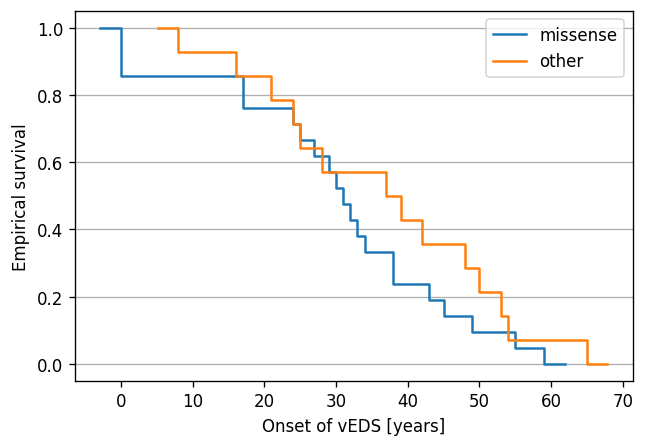

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from gpsea.model import Age

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
missense_survival_result.plot_kaplan_meier_curves(
    ax=ax,
)
_ = ax.xaxis.set(
    major_formatter=mpl.ticker.FuncFormatter(lambda x, pos: f"{x / Age.DAYS_IN_YEAR:.0f}"),
    major_locator=mpl.ticker.MultipleLocator(10 * Age.DAYS_IN_YEAR),
)
_ = ax.set(
    xlabel="Onset of vEDS [years]",
    ylabel="Empirical survival",
)
_ = ax.grid(axis="y")

# Summary

In [37]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

f_results =  (
 GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ), GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=triple_result,
    ), 
    GPAnalysisResultSummary.from_multi(
        result=dx_result,
    ), 
     GPAnalysisResultSummary.from_multi(
        result=is_gly_missense_result,
    ), 
)

m_results = (
    GPAnalysisResultSummary.from_mono(
        result=missense_survival_result
    ),
)

caption = "No significant GPC identified. Frank et al (2015) found that glycine missense variants were associated with a higher degree of severity in a cohort of 215 individuals. Primary data was not made available."

report = GpseaAnalysisReport(
    name=gene_symbol,
    cohort=cohort,
    fet_results=f_results,
    mono_results=m_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption=caption,
)

In [38]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [39]:
summarizer.process_latex(report=report, protein_fig=COL3A1_fig)

Figure saved to ../../supplement/img/COL3A1_protein_diagram-draft.pdf
Output to ../../supplement/tex/COL3A1_summary_draft.tex
